In [1]:
import pandas as pd
import numpy as np
import re


In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [3]:
df=pd.read_csv(r"D:\Projects\Movie Review Analysis Proeject\IMDB Dataset.csv")

In [4]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [7]:
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0}).astype(int)

df.head()

C:\Users\Palakolanu Mounika\AppData\Local\Temp\ipykernel_23328\551340588.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0}).astype(int)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [8]:
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# Visualisations

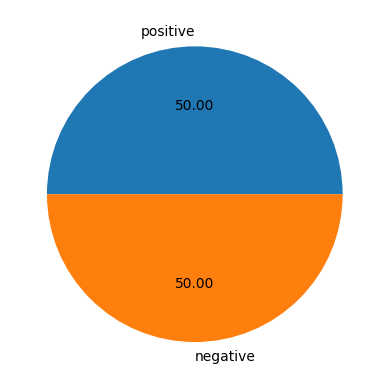

In [9]:
import matplotlib.pyplot as plt
plt.pie(df["sentiment"].value_counts(),labels=['positive','negative'],autopct="%0.2f")
plt.show()

In [10]:
df['num_characters'] = df['review'].apply(len)
df['num_characters']

0        1761
1         998
2         926
3         748
4        1317
         ... 
49995    1008
49996     642
49997    1280
49998    1234
49999     678
Name: num_characters, Length: 50000, dtype: int64

In [11]:
import nltk
df['num_words'] = df['review'].apply(lambda x:len(nltk.word_tokenize(x)))


In [12]:
df['num_sentences']=df['review'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [13]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,50000.000000,50000.000000,50000.000000
mean,1309.431020,279.483720,10.741440
std,989.728014,207.949849,7.900587
min,32.000000,8.000000,1.000000
25%,699.000000,151.000000,6.000000
50%,970.000000,209.000000,9.000000
75%,1590.250000,340.000000,13.000000
max,13704.000000,2911.000000,282.000000


In [14]:
df[df['sentiment']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,25000.000000,25000.000000,25000.000000
mean,1294.064360,278.609440,11.026880
std,945.892669,201.294667,7.880229
min,32.000000,8.000000,1.000000
25%,706.000000,153.000000,6.000000
50%,973.000000,211.000000,9.000000
75%,1567.250000,338.000000,13.000000
max,8969.000000,1936.000000,118.000000


In [15]:
df[df['review']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


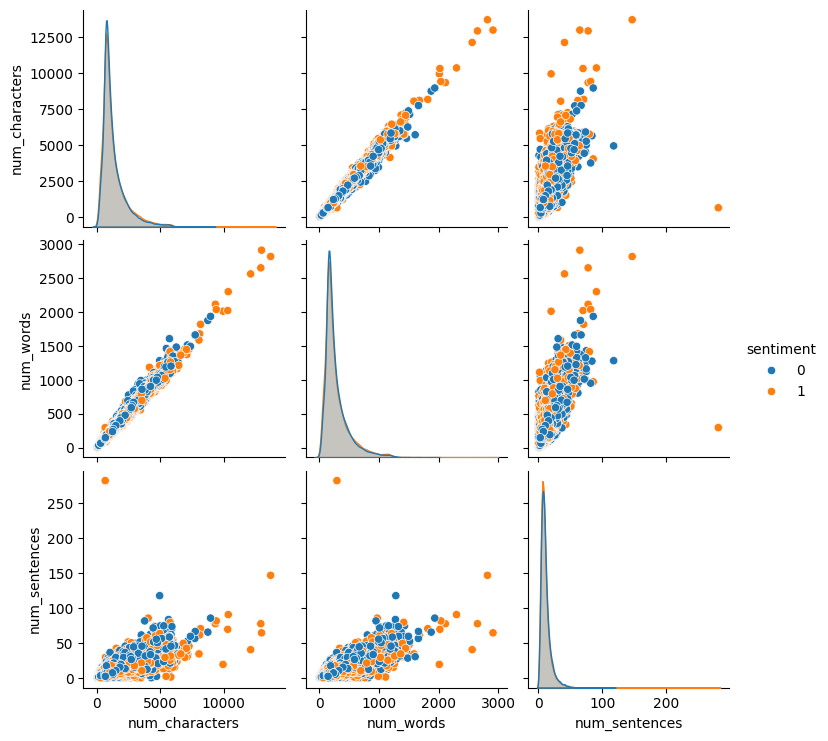

In [16]:
import seaborn as sns
sns.pairplot(df,hue='sentiment')
plt.show()

In [17]:
df

,review,sentiment,num_characters,num_words,num_sentences
0,One of the other reviewers has mentioned that ...,1,1761,380,10
1,A wonderful little production. <br /><br />The...,1,998,201,7
2,I thought this was a wonderful way to spend ti...,1,926,205,4
3,Basically there's a family where a little boy ...,0,748,175,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,9
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,1,1008,241,8
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,642,138,3
49997,I am a Catholic taught in parochial elementary...,0,1280,271,6
49998,I'm going to have to disagree with the previou...,0,1234,240,8


In [18]:
# Exculde the non-numeric columns from the correlation analysis
numeric_df=df.select_dtypes('number')

<Axes: >

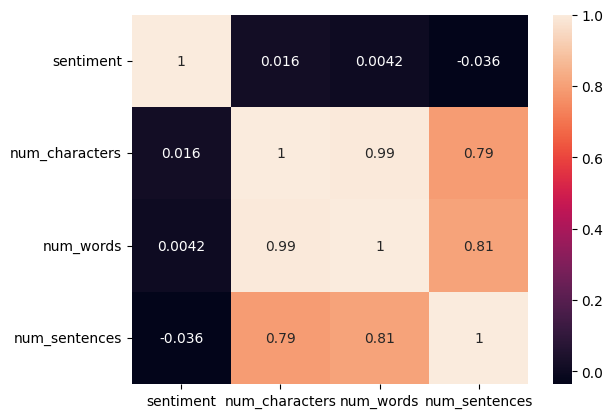

In [19]:
# plot the correlation hearmap
sns.heatmap(numeric_df.corr(),annot=True)

In [20]:
df.head()

,review,sentiment,num_characters,num_words,num_sentences
0,One of the other reviewers has mentioned that ...,1,1761,380,10
1,A wonderful little production. <br /><br />The...,1,998,201,7
2,I thought this was a wonderful way to spend ti...,1,926,205,4
3,Basically there's a family where a little boy ...,0,748,175,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,9


In [21]:
def remove_html_tags(sentence):
    clean_sentence=re.sub(r'<.*?>-','',sentence)
    return clean_sentence
df.review=df.review.apply(remove_html_tags)
df.review[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [22]:
def remove_special_characters(sentence):
    #define a pattern to match speacil characters
    pattern=r'[^a-zA-Z0-9\s]'
    # use re.sub() to replace the specila characters with the empty string
    clean_sentence=re.sub(pattern, '',sentence)
    return clean_sentence
df.review=df.review.apply(remove_special_characters)
df.review[1]

'A wonderful little production br br The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [23]:
def to_lower(text):
    return text.lower()

df.review = df.review.apply(to_lower)
df.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Palakolanu
[nltk_data]     Mounika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Palakolanu
[nltk_data]     Mounika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

dfreview = df.review.apply(rem_stopwords)
df.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [27]:
from nltk.stem import PorterStemmer
def preprocess_text(text):
    #initiate the porterstemmer
    stemmer=PorterStemmer()

#tokenize the text
    words=word_tokenize(text)
    #remove stopwords
    stop_words=set(stopwords.words('english'))
    filtered_words=[w for w in words if w.lower() not in stop_words]
    #stem th words
    stemmed_words=[stemmer.stem(word) for word in filtered_words]
    #join the stemmed words back into the single day
    preprocessed_text=' '.join(stemmed_words)
    return preprocessed_text
df.review=df.review.apply(preprocess_text)

In [28]:
#!pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [29]:
df['transformed_text']=df['review'].apply(preprocess_text)

In [30]:
positive_wc=wc.generate(df[df['sentiment']==1]['transformed_text'].str.cat(sep=""))

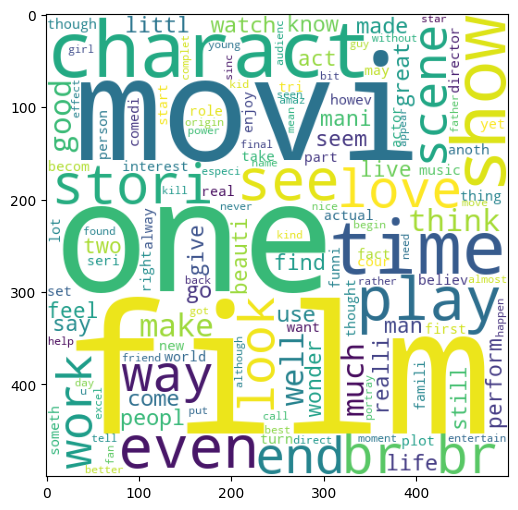

In [32]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

In [33]:
negative_wc=wc.generate(df[df['sentiment']==0]['transformed_text'].str.cat(sep=""))

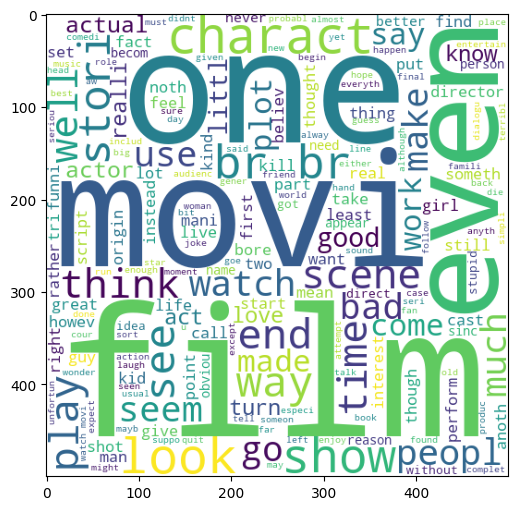

In [34]:
plt.figure(figsize=(10,6))
plt.imshow(negative_wc)

In [35]:
positive_corpus = []
for msg in df[df['sentiment'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        positive_corpus.append(word)

In [36]:
len(positive_corpus)

3067257

In [37]:
negative_corpus=[]
for msg in df[df['sentiment']==0]['transformed_text'].tolist():
    for word in msg.split():
        negative_corpus.append(word)

In [38]:
len(negative_corpus)

3006037

In [39]:
X = np.array(df.iloc[:,0].values)
y = np.array(df.sentiment.values)
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(df.review).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (50000, 1000)
y.shape =  (50000,)


In [40]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# X = np.array(df.iloc[:,0].values)
# y = np.array(df.sentiment.values)
# # Initialize TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer()

# # Fit and transform the corpus to create TF-IDF representation
# X = tfidf_vectorizer.fit_transform(df.review)

# # Get the vocabulary
# tfidf_vocab = tfidf_vectorizer.get_feature_names_out()

# print("X.shape = ",X.shape)
# print("y.shape = ",y.shape)

In [41]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=9)
print('Train shapes: X={},y={}'.format(train_x.shape,train_y.shape))
print('Test shapes:X={},y={}'.format(test_y.shape,test_y.shape))

Train shapes: X=(40000, 1000),y=(40000,)
Test shapes:X=(10000,),y=(10000,)


In [42]:
gnb,mnb,bnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
gnb.fit(train_x,train_y)
mnb.fit(train_x,train_y)
bnb.fit(train_x,train_y)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [43]:
ypg=gnb.predict(test_x)
ypm=mnb.predict(test_x)
ypb=bnb.predict(test_x)

print('Gaussian=',accuracy_score(test_y,ypg))
print('Multinomial=',accuracy_score(test_y,ypm))
print('Bernoulli=',accuracy_score(test_y,ypb))

Gaussian= 0.786
Multinomial= 0.8266
Bernoulli= 0.8281


In [44]:
print(accuracy_score(test_y,ypg))
print(confusion_matrix(test_y,ypm))
print(precision_score(test_y,ypb))

0.786
[[4159  864]
 [ 870 4107]]
0.8150870406189555


In [45]:
#!pip install xgboost

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#!pip install xgboost

In [47]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [48]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [49]:
def train_classifier(clf,train_x,train_y,test_x,test_y):
    clf.fit(train_x,train_y)
    y_pred=clf.predict(test_x)
    accuracy=accuracy_score(test_y,y_pred)
    precision=precision_score(test_y,y_pred) 

    return accuracy,precision

In [52]:
accuracy=[]
precision=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,train_x,train_y,test_x,test_y)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precison - ",current_precision)
    accuracy.append(current_accuracy)
    precision.append(current_precision)

For  SVC
Accuracy -  0.5444
Precison -  0.5423626484202053
For  KN
Accuracy -  0.6421
Precison -  0.6286345233713655
For  NB
Accuracy -  0.8266
Precison -  0.8261919130959565
For  DT
Accuracy -  0.7013
Precison -  0.6431242807825086
For  LR
Accuracy -  0.8608
Precison -  0.8538993089832182
For  RF
Accuracy -  0.8205
Precison -  0.8221952207371406
For  AdaBoost
Accuracy -  0.7414
Precison -  0.7669122572002679
For  BgC
Accuracy -  0.7987
Precison -  0.7947494033412887
For  ETC
Accuracy -  0.8301
Precison -  0.8416006669445603
For  GBDT
Accuracy -  0.782
Precison -  0.743090561446202
For  xgb
Accuracy -  0.8368
Precison -  0.8234384064977761


In [55]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuarcy':accuracy,'Precision':precision}).sort_values('Precision',ascending=False)


In [56]:
performance_df

,Algorithm,Accuarcy,Precision
4,LR,0.8608,0.853899
8,ETC,0.8301,0.841601
2,NB,0.8266,0.826192
10,xgb,0.8368,0.823438
5,RF,0.8205,0.822195
7,BgC,0.7987,0.794749
6,AdaBoost,0.7414,0.766912
9,GBDT,0.7820,0.743091
3,DT,0.7013,0.643124
1,KN,0.6421,0.628635


In [57]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [58]:
performance_df1

,Algorithm,variable,value
0,LR,Accuarcy,0.860800
1,ETC,Accuarcy,0.830100
2,NB,Accuarcy,0.826600
3,xgb,Accuarcy,0.836800
4,RF,Accuarcy,0.820500
5,BgC,Accuarcy,0.798700
6,AdaBoost,Accuarcy,0.741400
7,GBDT,Accuarcy,0.782000
8,DT,Accuarcy,0.701300
9,KN,Accuarcy,0.642100


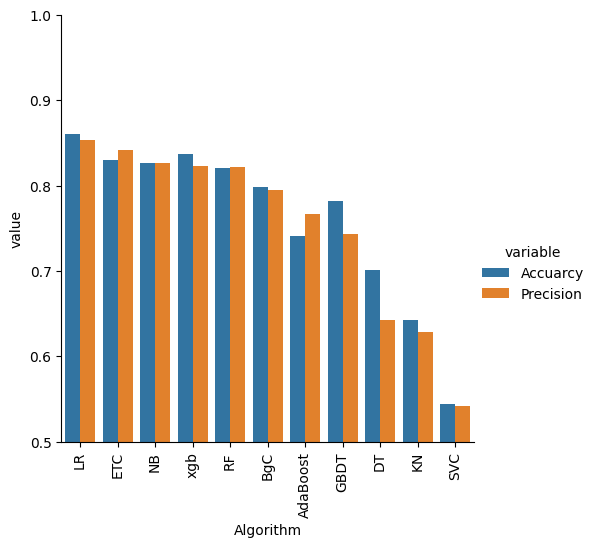

In [59]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [60]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [61]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(train_x,train_y)

In [ ]:
y_pred = voting.predict(test_x)
print("Accuracy",accuracy_score(test_y,y_pred))
print("Precision",precision_score(test_y,y_pred))

In [ ]:
import pickle
pickle.dump(voting,open('model1.pkl','wb'))

In [ ]:
mnb.fit(train_x,train_y)

In [ ]:
import pickle
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
pickle.dump(cv,open('vectorizer.pkl','wb'))

In [ ]:
import sklearn
print(sklearn.__version__)